In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
df=pd.read_csv("Google_Stock_Price_Train.csv")

In [45]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [46]:
training_set=df.loc[:,"Open"]

In [81]:
train_data=df.loc[:,"Open"]

In [47]:
training_set=training_set.values

In [51]:
training_set=training_set.reshape(1258,1)#1258 is the no. of values

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [55]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [56]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [57]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [58]:
model= Sequential()

In [59]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#return seuences are true if you want to add aone more LSTM layer
model.add(Dropout(0.2))

In [60]:
model.add(LSTM(units = 50, return_sequences = True ))#return seuences are true if you want to add aone more LSTM layer
model.add(Dropout(0.2))

In [61]:
model.add(LSTM(units = 50, return_sequences = True ))#return seuences are true if you want to add aone more LSTM layer
model.add(Dropout(0.2))

In [62]:
model.add(LSTM(units = 50 ))#return seuences are true if you want to add aone more LSTM layer
model.add(Dropout(0.2))

In [63]:
model.add(Dense(1))

In [64]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [65]:
model.fit(X_train,y_train, epochs=10,batch_size= 32)

Epoch 1/10
1198/1198 [==============================] - 34s 28ms/step - loss: 0.0420
Epoch 2/10
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0065
Epoch 3/10
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0056
Epoch 4/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 5/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0045
Epoch 6/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0044
Epoch 7/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0044
Epoch 8/10
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0040
Epoch 9/10
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0041
Epoch 10/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0042


In [67]:
dataset=pd.read_csv("Google_Stock_Price_Test.csv")

In [68]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [69]:
real_test_data=dataset.iloc[:,1]

In [78]:
test_data=dataset.iloc[:,1]

In [98]:
test_data

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [75]:
real_test_data=real_test_data.values.reshape(20,1)

In [82]:
dataset_total=pd.concat((train_data,test_data), axis=0)

In [84]:
dataset_total.tail()

15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [85]:
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

In [90]:
inputs=inputs.reshape(-1,1)

In [92]:
inputs=sc.transform(inputs)

In [93]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [95]:
X_test = []
for i in range(60, 80):# from 60 to number of  values present in test data 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [96]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [97]:
predicted_stock_price

array([[798.57043],
       [799.5669 ],
       [800.2353 ],
       [800.61676],
       [800.7968 ],
       [800.9073 ],
       [801.0751 ],
       [801.38275],
       [801.87805],
       [802.5747 ],
       [803.45746],
       [804.4866 ],
       [805.6084 ],
       [806.7745 ],
       [807.9434 ],
       [809.13654],
       [810.4133 ],
       [811.8552 ],
       [813.50775],
       [815.30334]], dtype=float32)

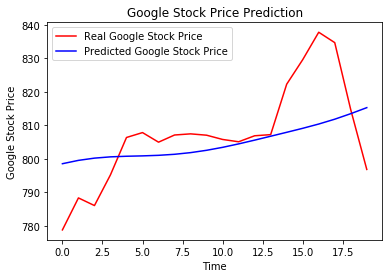

In [99]:
plt.plot(test_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [100]:
X_test = []
for i in range(60, 61):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [101]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [102]:
predicted_stock_price

array([[798.5705]], dtype=float32)